## Init

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from svd import ApproxSVD
from scipy.sparse.linalg import svds
import tests

In [2]:
np.random.seed(42)
random_matrix = np.random.rand(700, 10000)

print(random_matrix)

[[0.3745 0.9507 0.732  ... 0.9467 0.3975 0.2171]
 [0.3736 0.3329 0.1762 ... 0.3037 0.4433 0.1723]
 [0.73   0.1845 0.3466 ... 0.0195 0.401  0.2574]
 ...
 [0.9379 0.9195 0.1268 ... 0.5465 0.5264 0.008 ]
 [0.1919 0.6577 0.2966 ... 0.8418 0.5756 0.3866]
 [0.872  0.6987 0.9775 ... 0.93   0.4613 0.0813]]


In [5]:
p = 300
u, s, vt = np.linalg.svd(random_matrix)
print(u)

[[-0.0374  0.0146 -0.0049 ...  0.0141 -0.0206  0.0864]
 [-0.0381  0.0295  0.0931 ... -0.0349  0.026  -0.0222]
 [-0.0378  0.0404  0.0091 ... -0.0173  0.0274 -0.0555]
 ...
 [-0.0378  0.0613 -0.065  ...  0.0316  0.0077 -0.0398]
 [-0.038   0.0191 -0.0584 ... -0.0011 -0.0405 -0.0405]
 [-0.0375  0.0035  0.0193 ...  0.0064 -0.0597 -0.0543]]


In [7]:
approx_svd = ApproxSVD(
    n_iter = 2000, 
    p = p, 
    score_method='cf', 
    debug_mode = True, 
    jobs=8, 
    stored_g=False, 
    use_shared_memory = False,
    use_heap = True)
traces, ubar, x_approx = approx_svd.fit(random_matrix)

# plt.plot(traces, label='Data')
# aux = u.transpose() @ random_matrix @ vt.transpose()
# true_energy = np.trace(aux[:p, :p])

# plt.axhline(y=true_energy, color='red', linestyle='dotted', linewidth=2, label='Real U trace')
# plt.ylim(bottom=min(0, traces.min()))
# plt.xlabel('Index')
# plt.ylabel('Trace')
# plt.title('Trace progression vs real U trace')
# plt.legend()
# plt.show()

DEBUG - Time: 53.376 seconds for initial scores
DEBUG - Time: 10.887 seconds for build heap
100%|██████████| 2000/2000 [00:49<00:00, 40.43it/s]
DEBUG - Time: 113.742 seconds for total time


In [8]:
# ubar projection
print(ubar[:p, :] @ random_matrix)
print()
# true u projection
print(u[:p, :] @ random_matrix)


[[-0.9093 -1.3003 -1.0368 ... -1.1735 -0.3812 -0.4878]
 [-0.625  -0.8654 -0.6411 ... -0.7066 -0.5977 -0.4644]
 [-0.9786 -0.3962 -0.9296 ... -0.0332 -0.3513 -0.8759]
 ...
 [ 0.8285  0.762   0.2932 ...  0.3617  0.6346  0.9388]
 [ 0.9174  0.7974  0.813  ...  0.0611  0.6778  0.9664]
 [ 0.3785  0.0267  0.7775 ...  0.7012  0.4013  0.0037]]

[[ 0.5131  0.7907  0.5114 ...  0.3969  0.2446  0.5274]
 [-0.2129 -0.1947 -0.715  ... -0.7526 -0.7021 -0.4736]
 [-0.2071 -0.1284 -0.3026 ... -0.2453 -0.1756  0.0608]
 ...
 [-1.157  -1.435  -0.845  ... -1.081  -0.9263 -0.8248]
 [ 0.4229  0.114  -0.6894 ...  0.2363  0.1286  0.2734]
 [ 0.559   0.7847  0.0051 ...  0.4007  0.736   0.3204]]


In [7]:
tests.run_tests(score_fn = 'cf')

0.04653686208321517

0.05489813751695749

0.0008677854048801947

0.17806285724675064

0.0024677249292412995

0.026889496868243157

0.011827555938641154

0.01915973248515712

0.0017878861189277728

0.0006685592274671137



DEBUG - Time: 4.767 seconds for initial scores
100%|██████████| 10000/10000 [00:10<00:00, 913.40it/s]
DEBUG - Time: 15.723 seconds for total time
DEBUG - Time: 4.611 seconds for initial scores
100%|██████████| 10000/10000 [00:48<00:00, 206.95it/s]
DEBUG - Time: 52.933 seconds for total time
DEBUG - Time: 4.412 seconds for initial scores
100%|██████████| 10000/10000 [00:55<00:00, 180.01it/s]
DEBUG - Time: 59.965 seconds for total time


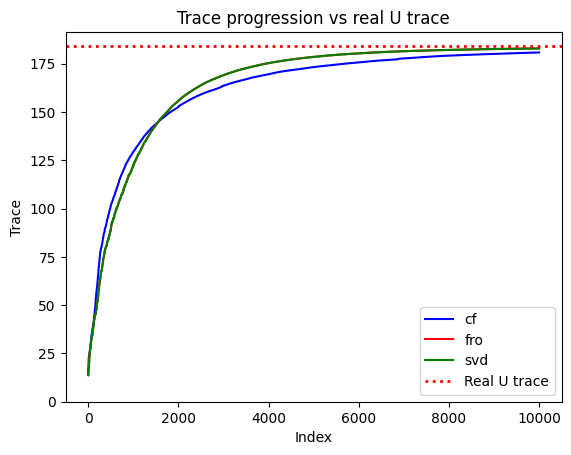

In [3]:
random_matrix = np.random.rand(50, 250)
p = 25
approx_svd = ApproxSVD(10000, p, 'cf', True)
traces, ubar, x_approx = approx_svd.fit(random_matrix)
u, s, vt = np.linalg.svd(random_matrix)
plt.plot(traces, label='cf', color = 'blue')
aux = u.transpose() @ random_matrix @ vt.transpose()
true_energy = np.trace(aux[:p, :p])

approx_svd = ApproxSVD(10000, p, 'fro', True)
traces, ubar, x_approx = approx_svd.fit(random_matrix)
plt.plot(traces, label='fro', color = 'red')

approx_svd = ApproxSVD(10000, p, 'svd', True)
traces, ubar, x_approx = approx_svd.fit(random_matrix)
plt.plot(traces, label='svd', color = 'green')

plt.axhline(y=true_energy, color='red', linestyle='dotted', linewidth=2, label='Real U trace')
plt.ylim(bottom=min(0, traces.min()))
plt.xlabel('Index')
plt.ylabel('Trace')
plt.title('Trace progression vs real U trace')
plt.legend()
plt.show()

In [12]:
random_matrix = np.random.rand(400, 5000)
p = 200
for jobs in range(1, 17):
    if jobs % 2 == 0:
        print("JOBS:", jobs)
        approx_svd = ApproxSVD(0, p, 'fro', True, jobs)
        traces, ubar, x_approx = approx_svd.fit(random_matrix)
        print()

JOBS: 2


DEBUG - Time: 40.498 seconds for initial scores
0it [00:00, ?it/s]
DEBUG - Time: 40.504 seconds for total time



JOBS: 4


DEBUG - Time: 25.598 seconds for initial scores
0it [00:00, ?it/s]
DEBUG - Time: 25.604 seconds for total time



JOBS: 6


DEBUG - Time: 21.785 seconds for initial scores
0it [00:00, ?it/s]
DEBUG - Time: 21.792 seconds for total time



JOBS: 8


DEBUG - Time: 18.700 seconds for initial scores
0it [00:00, ?it/s]
DEBUG - Time: 18.706 seconds for total time



JOBS: 10


DEBUG - Time: 21.183 seconds for initial scores
0it [00:00, ?it/s]
DEBUG - Time: 21.190 seconds for total time



JOBS: 12


DEBUG - Time: 18.749 seconds for initial scores
0it [00:00, ?it/s]
DEBUG - Time: 18.755 seconds for total time



JOBS: 14


DEBUG - Time: 18.700 seconds for initial scores
0it [00:00, ?it/s]
DEBUG - Time: 18.707 seconds for total time



JOBS: 16


DEBUG - Time: 20.556 seconds for initial scores
0it [00:00, ?it/s]
DEBUG - Time: 20.563 seconds for total time


In [9]:
random_matrix = np.random.rand(400, 5000)
p = 200
approx_svd = ApproxSVD(500, p, 'fro', True, 8, False)
traces, ubar, x_approx = approx_svd.fit(random_matrix)

DEBUG - Time: 18.809 seconds for initial scores
100%|██████████| 500/500 [01:42<00:00,  4.89it/s]
DEBUG - Time: 121.116 seconds for total time


# Validate Ubar
Extract mean from random matrix (to center it) and then project it with Ubar to functionally perform PCA (not sure)

In [ ]:
from sklearn.decomposition import PCA
random_mean = np.mean(random_matrix, axis=1, keepdims=True)
random_centered = random_matrix - random_mean
_, ubar, _ = svd.approx_svd(random_centered, p, 200)
random_transposed = random_centered.transpose()

# PCA to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(random_transposed)

print(ubar[:p, :] @ random_centered)
print()
print(u[:p, :] @ random_matrix)
print()
print(X_pca.transpose())
print(np.linalg.norm(ubar[:p, :] @ random_matrix, 'fro'))
print(np.linalg.norm(u[:p, :] @ random_matrix, 'fro'))

KeyboardInterrupt: 

: 